In [2]:

import pandas as pd
import numpy as np
import re
import codecs
import itertools
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import gensim
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import itertools
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Limpeza dos dados

In [ ]:
input_file = codecs.open("socialmedia_relevant_cols.csv", "r",encoding='utf-8', errors='replace')
output_file = open("socialmedia_relevant_cols_clean.csv", "w")

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

In [3]:
questions = pd.read_csv("socialmedia_relevant_cols_clean.csv") 
questions.columns=['text', 'choose_one', 'class_label']

In [4]:
questions

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10854,1.3 #Earthquake in 9Km Ssw Of Anza California ...,Relevant,1
10855,Evacuation order lifted for town of Roosevelt:...,Relevant,1
10856,See the 16yr old PKK suicide bomber who detona...,Relevant,1
10857,To conference attendees! The blue line from th...,Relevant,1


In [5]:
# Estatística descritiva
questions.describe()

,class_label
count,10859.000000
mean,0.431808
std,0.498317
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [6]:
# Expressões regulares para limpeza dos dados 
def standardize_text(df, text_field):    
    df[text_field] = df[text_field].str.replace(r"http\S+", "")    
    df[text_field] = df[text_field].str.replace(r"http", "")    
    df[text_field] = df[text_field].str.replace(r"@\S+", "")    
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")    
    df[text_field] = df[text_field].str.replace(r"@", "at")    
    df[text_field] = df[text_field].str.lower()    
    return df

In [7]:
clean_questions = standardize_text(questions, "text") 
clean_questions.to_csv("clean_data.csv")

c:\Users\STEFA\anaconda3\envs\ste\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\STEFA\anaconda3\envs\ste\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\Users\STEFA\anaconda3\envs\ste\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
#Dados limpos
clean_questions.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1


In [9]:
#Distribuição das classes:
clean_questions.groupby("class_label").count()

,text,choose_one
class_label,,
0,6186,6186
1,4657,4657
2,16,16


## Quebrando os dados

In [11]:
from nltk.tokenize import RegexpTokenizer 
# Método de quebra dos dados 
tokenizer = RegexpTokenizer(r'\w+') 
# Gerando listas de sentenças quebradas 
clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)

In [12]:
#Inspecioanndo novamente os dados 
all_words = [word for tokens in clean_questions["tokens"] for word in tokens] 
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]] 
VOCAB = sorted(list(set(all_words))) 
print("%s Quantidade total de palavras, com um vocabulario de %s" % (len(all_words), len(VOCAB)))
print("Tamanho máximo de uma sentença %s" % max(sentence_lengths))

154484 Quantidade total de palavras, com um vocabulario de 18095
Tamanho máximo de uma sentença 34


In [13]:
#Inspecioanndo novamente os dados 
all_words = [word for tokens in clean_questions["tokens"] for word in tokens] 
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]] 
VOCAB = sorted(list(set(all_words))) 
print("%s Quantidade total de palavras, com um vocabulario de %s" % (len(all_words), len(VOCAB)))
print("Tamanho máximo de uma sentença %s" % max(sentence_lengths))

154484 Quantidade total de palavras, com um vocabulario de 18095
Tamanho máximo de uma sentença 34


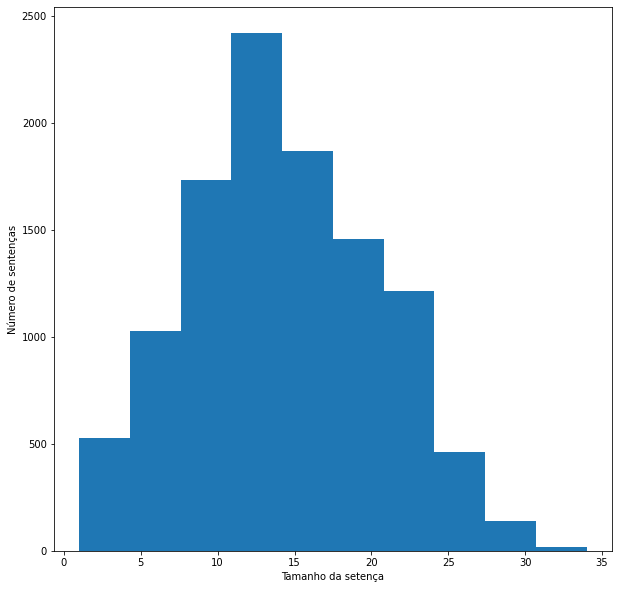

In [15]:
#Distribuição das sentenças por quantidade de palavras 
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da setença') 
plt.ylabel('Número de sentenças') 
plt.hist(sentence_lengths) 
plt.show()

## NLP e ML

In [16]:
## Count Vectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Construindo bag-of-words com count-vectorizer 
count_vectorizer = CountVectorizer() 
# Separando o texto da variável alvo 
list_corpus = clean_questions["text"].tolist() 
list_labels = clean_questions["class_label"].tolist() 
# Construindo exemplos para treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)                                                           
# Aprendendo o vacabulário e contabilizando os termos para teste 
X_train_counts = count_vectorizer.fit_transform(X_train) 
# Contabilizando os termos no vocabulário aprendido para treino 
X_test_counts = count_vectorizer.transform(X_test)

## Visualização do Vocabulário

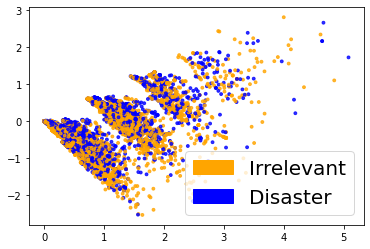

<Figure size 720x720 with 0 Axes>

In [17]:
from sklearn.decomposition import PCA, TruncatedSVD

# Método para plotar o gráfico com a distribuição do vocabulário por variável alvo 
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)        
        lsa.fit(test_data)        
        lsa_scores = lsa.transform(test_data)        
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}        
        color_column = [color_mapper[label] for label in test_labels]        
        colors = ['orange','blue','blue']        
        if plot:            
           plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
           red_patch = mpatches.Patch(color='orange', label='Irrelevant')            
           green_patch = mpatches.Patch(color='blue', label='Disaster')           
           plt.legend(handles=[red_patch, green_patch], prop={'size': 20})            
           
           return plt

plt_ = plot_LSA(X_train_counts, y_train)
fig = plt.figure(figsize=(10, 10))          
plt.show()

## Classificação

In [18]:
from sklearn.linear_model import LogisticRegression

# Aplicando configurações no modelo 
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', n_jobs=-1, random_state=40) 
#Treinando o modelo com o vocabulário construindo e as variáveis alvo 
clf.fit(X_train_counts, y_train) 
#Realizando as predições para o conjunto de teste 
y_predicted_counts = clf.predict(X_test_counts)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Método para extração das métricas de avaliação usando a parte dos dados que separamos para teste. 
def get_metrics(y_test, y_predicted):      
   # true positives / (true positives+false positives)    
   precision = precision_score(y_test, y_predicted, pos_label=None,average='weighted')                 
   # true positives / (true positives + false negatives)    
   recall = recall_score(y_test, y_predicted, pos_label=None,average='weighted')        
   # harmonic mean of precision and recall    
   f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')        
   # true positives + true negatives/ total    
   accuracy = accuracy_score(y_test, y_predicted)    
   return accuracy, precision, recall, f1 

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts) 
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.761, precision = 0.758, recall = 0.761, f1 = 0.759


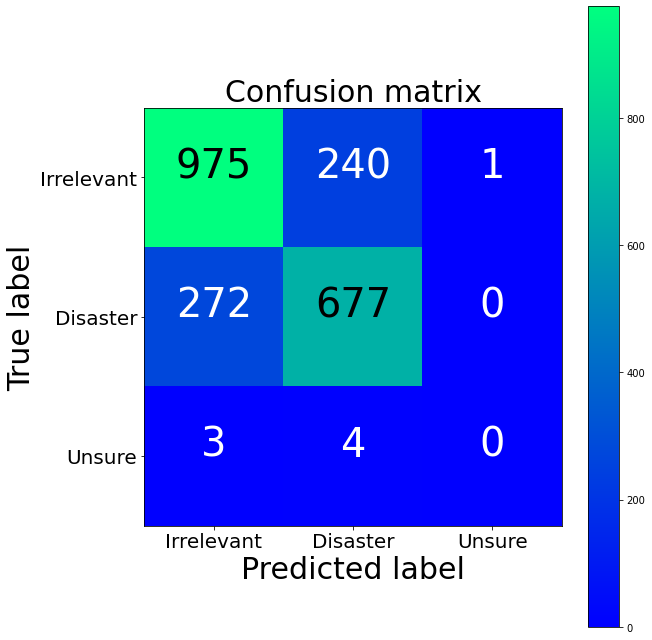

Count Vectorizer confusion matrix
[[975 240   1]
 [272 677   0]
 [  3   4   0]]


In [20]:
from sklearn.metrics import confusion_matrix

#Método para plotar a matriz de confusão. 
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.winter): 
    if normalize:        
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)    
    plt.title(title, fontsize=30)    
    plt.colorbar()    
    tick_marks = np.arange(len(classes))    
    plt.xticks(tick_marks, classes, fontsize=20)    
    plt.yticks(tick_marks, classes, fontsize=20)        
    fmt = '.2f' if normalize else 'd'    
    thresh = cm.max() / 2.     
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):        
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()   
    plt.ylabel('True label', fontsize=30)    
    plt.xlabel('Predicted label', fontsize=30)     
   
    return plt

cm = confusion_matrix(y_test, y_predicted_counts) 
fig = plt.figure(figsize=(9, 9)) 
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix') 
plt.show() 
print("Count Vectorizer confusion matrix") 
print(cm)

In [21]:
# Método para identificação das features mais importantes na tomada de decisão. 
def get_most_important_features(vectorizer, model, n=5):    
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}        
    # loop for each class    
    classes ={}    
    for class_index in range(model.coef_.shape[0]):        
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]        
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)        
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])        
        bottom = sorted_coeff[-n:]        
        classes[class_index] = {'tops':tops,'bottom':bottom}    
    return classes 

importance = get_most_important_features(count_vectorizer, clf, 10)

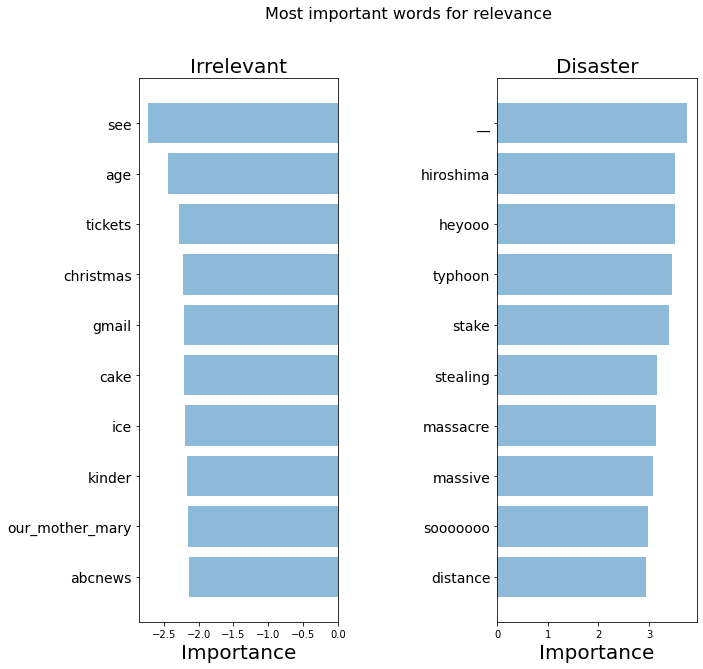

In [22]:
# Método para plotar as featrues mais importantes para cada variável alvo. 
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):    
    y_pos = np.arange(len(top_words))    
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]    
    top_pairs = sorted(top_pairs, key=lambda x: x[1])        
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]    
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)        
    top_words = [a[0] for a in top_pairs]    
    top_scores = [a[1] for a in top_pairs]        
    bottom_words = [a[0] for a in bottom_pairs]    
    bottom_scores = [a[1] for a in bottom_pairs]        
    fig = plt.figure(figsize=(10, 10))      
    plt.subplot(121)    
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)    
    plt.title('Irrelevant', fontsize=20)    
    plt.yticks(y_pos, bottom_words, fontsize=14)    
    plt.suptitle('Key words', fontsize=16)    
    plt.xlabel('Importance', fontsize=20)        
    plt.subplot(122)    
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)    
    plt.title('Disaster', fontsize=20)    
    plt.yticks(y_pos, top_words, fontsize=14)    
    plt.suptitle(name, fontsize=16)    
    plt.xlabel('Importance', fontsize=20)        
    plt.subplots_adjust(wspace=0.8)    
    plt.show()
    
top_scores = [a[0] for a in importance[1]['tops']] 
top_words = [a[1] for a in importance[1]['tops']] 
bottom_scores = [a[0] for a in importance[1]['bottom']] 
bottom_words = [a[1] for a in importance[1]['bottom']] 
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## TF-IDF Bag of Words

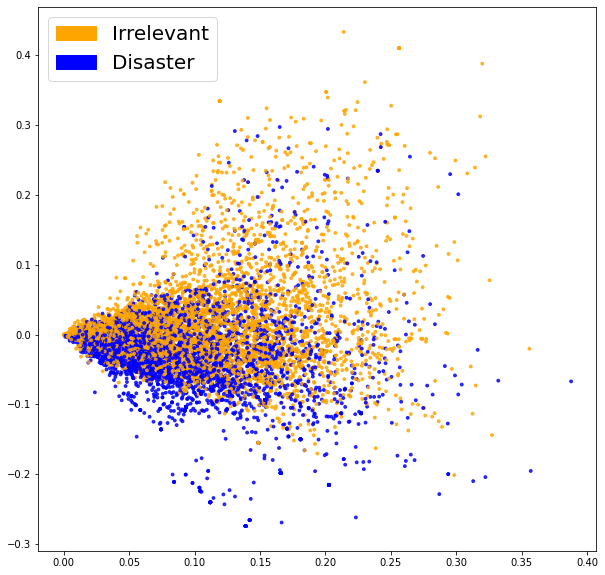

In [23]:
# Construindo bag-of-words com count-vectorizer 
tfidf_vectorizer = TfidfVectorizer() 
# Aprendendo o vacabulário e contabilizando os termos para teste 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) 
# Contabilizando os termos no vocabulário aprendido para treino 
X_test_tfidf = tfidf_vectorizer.transform(X_test) 
# Plotando a distribuição do vocabulário 
fig = plt.figure(figsize=(10, 10))          
plt__ = plot_LSA(X_train_tfidf, y_train) 
plt.show()

In [25]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',                          multi_class='multinomial', n_jobs=-1, random_state=40) 
#Treinando o modelo com o vocabulário construindo e as variáveis alvo 
clf_tfidf.fit(X_train_tfidf, y_train) 
y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf) 
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf,recall_tfidf, f1_tfidf))

accuracy = 0.760, precision = 0.757, recall = 0.760, f1 = 0.758


c:\Users\STEFA\anaconda3\envs\ste\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


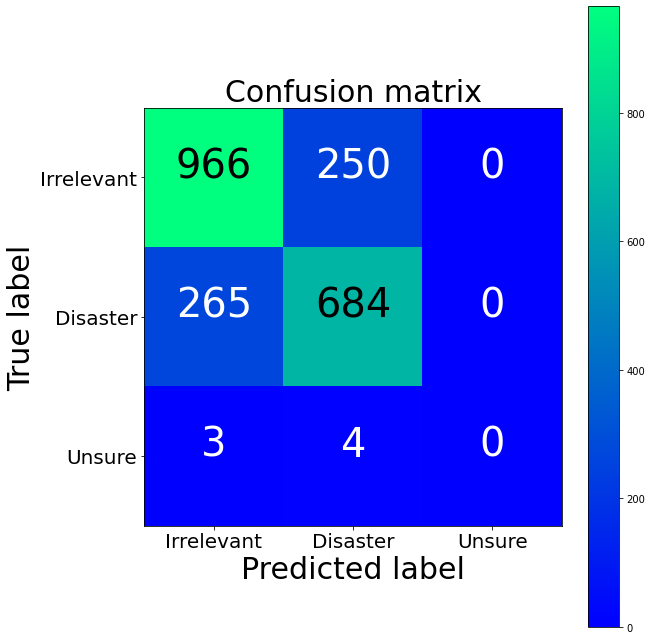

TFIDF confusion matrix
[[966 250   0]
 [265 684   0]
 [  3   4   0]]
BoW confusion matrix
[[975 240   1]
 [272 677   0]
 [  3   4   0]]


In [26]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf) 
fig = plt.figure(figsize=(9, 9)) 
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix') 
plt.show() 
print("TFIDF confusion matrix") 
print(cm2)
print("BoW confusion matrix") 
print(cm)

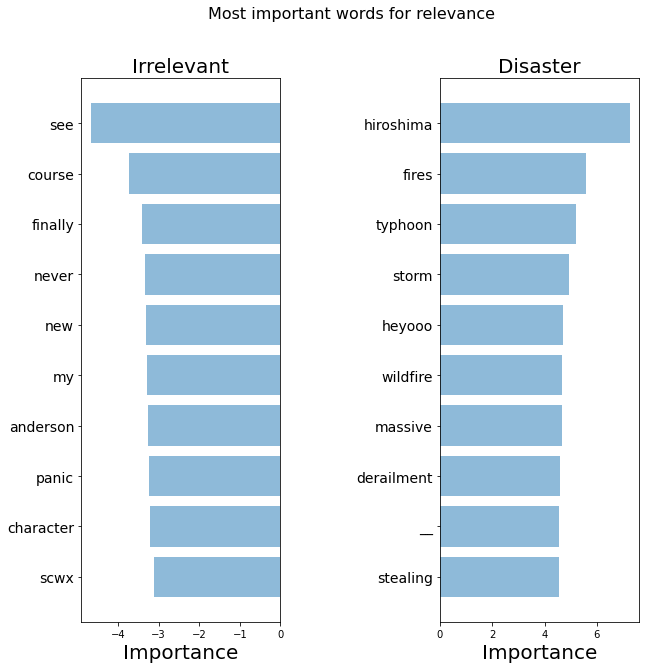

In [27]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

top_scores = [a[0] for a in importance_tfidf[1]['tops']] 
top_words = [a[1] for a in importance_tfidf[1]['tops']] 
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']] 
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']] 
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## Usando o Word2vec

In [29]:

import gensim
 
word2vec_path = r"C:\Users\STEFA\Desktop\github\computacao_cognitiva_atlantico\Trailhead\trilha01\GoogleNews-vectors-negative300.bin.gz" 
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [31]:
#Método para calcular a distância semântica entre as palavras 
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):    
    if len(tokens_list)<1:        
       return np.zeros(k)    
    if generate_missing:        
       vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]    
    else:        
       vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]    
    length = len(vectorized)    
    summed = np.sum(vectorized, axis=0)    
    averaged = np.divide(summed, length)    
    return averaged

#Montagem do arquivo de treinamento contento a relação semântica entre as palavras 
def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):    
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors,generate_missing=generate_missing))    
    return list(embeddings)

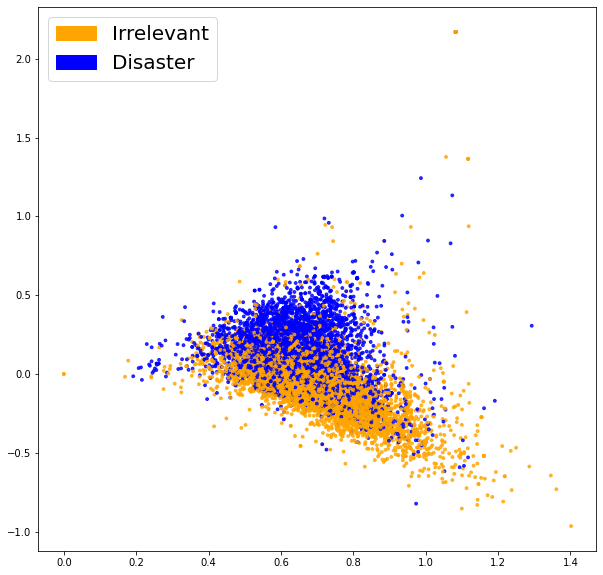

In [32]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions) 
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels,test_size=0.2, random_state=40) 
fig = plt.figure(figsize=(10, 10))          
plot_LSA(embeddings, list_labels)
plt.show()

In [33]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', random_state=40) 
clf_w2v.fit(X_train_word2vec, y_train_word2vec) 
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [34]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec) 
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec,recall_word2vec, f1_word2vec))

accuracy = 0.772, precision = 0.772, recall = 0.772, f1 = 0.772


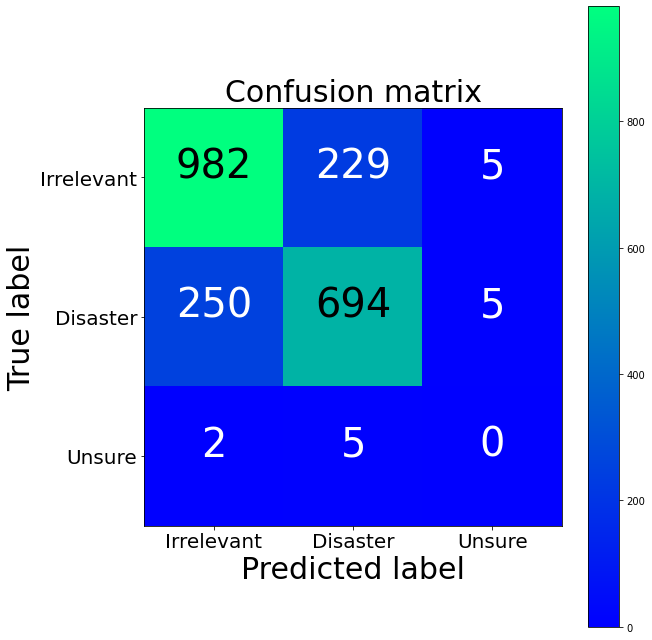

Word2Vec confusion matrix
[[982 229   5]
 [250 694   5]
 [  2   5   0]]
TFIDF confusion matrix
[[966 250   0]
 [265 684   0]
 [  3   4   0]]
BoW confusion matrix
[[975 240   1]
 [272 677   0]
 [  3   4   0]]


In [35]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec) 
fig = plt.figure(figsize=(9, 9)) 
plot = plot_confusion_matrix(cm_w2v, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show() 
print("Word2Vec confusion matrix") 
print(cm_w2v) 
print("TFIDF confusion matrix")
print(cm2) 
print("BoW confusion matrix") 
print(cm)

## Tokenização e segmentação de sentenças

In [37]:
import stanza 

nlp = stanza.Pipeline(lang='en', processors='tokenize') 
doc = nlp('This is a test sentence for stanza. This is another sentence.') 
for i, sentence in enumerate(doc.sentences):     
    print(f'====== Sentence {i+1} tokens =======')     
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-05-13 08:50:07 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-05-13 08:50:07 INFO: Use device: cpu
2022-05-13 08:50:07 INFO: Loading: tokenize
2022-05-13 08:50:07 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: test
id: (5,)	text: sentence
id: (6,)	text: for
id: (7,)	text: stanza
id: (8,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: another
id: (4,)	text: sentence
id: (5,)	text: .


In [38]:
print([sentence.text for sentence in doc.sentences])

['This is a test sentence for stanza.', 'This is another sentence.']


## Tokenização sem Segmentação de Sentença

In [39]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True)
doc = nlp('This is a sentence.\n\nThis is a second. This is a third.')
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-05-13 08:50:35 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-05-13 08:50:35 INFO: Use device: cpu
2022-05-13 08:50:35 INFO: Loading: tokenize
2022-05-13 08:50:35 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: sentence
id: (5,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: second
id: (5,)	text: .
id: (6,)	text: This
id: (7,)	text: is
id: (8,)	text: a
id: (9,)	text: third
id: (10,)	text: .


In [40]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_pretokenized=True)
doc = nlp('This is token.ization done my way!\nSentence split, too!')
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-05-13 08:50:48 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-05-13 08:50:48 INFO: Use device: cpu
2022-05-13 08:50:48 INFO: Loading: tokenize
2022-05-13 08:50:48 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: token.ization
id: (4,)	text: done
id: (5,)	text: my
id: (6,)	text: way!
====== Sentence 2 tokens =======
id: (1,)	text: Sentence
id: (2,)	text: split,
id: (3,)	text: too!


In [41]:
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_pretokenized=True)
doc = nlp([['This', 'is', 'token.ization', 'done', 'my', 'way!'], ['Sentence', 'split,', 'too!']])
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-05-13 08:50:57 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-05-13 08:50:57 INFO: Use device: cpu
2022-05-13 08:50:57 INFO: Loading: tokenize
2022-05-13 08:50:57 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: token.ization
id: (4,)	text: done
id: (5,)	text: my
id: (6,)	text: way!
====== Sentence 2 tokens =======
id: (1,)	text: Sentence
id: (2,)	text: split,
id: (3,)	text: too!


## Lematização

In [42]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')
doc = nlp('Barack Obama was born in Hawaii.')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-05-13 08:51:23 WARNING: Can not find mwt: default from official model list. Ignoring it.


2022-05-13 08:51:52 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-05-13 08:51:52 INFO: Use device: cpu
2022-05-13 08:51:52 INFO: Loading: tokenize
2022-05-13 08:51:52 INFO: Loading: pos
2022-05-13 08:51:53 INFO: Loading: lemma
2022-05-13 08:51:53 INFO: Done loading processors!


word: Barack 	lemma: Barack
word: Obama 	lemma: Obama
word: was 	lemma: be
word: born 	lemma: bear
word: in 	lemma: in
word: Hawaii 	lemma: Hawaii
word: . 	lemma: .


## NLTK

In [43]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [45]:
from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [47]:
nltk.download('punkt')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json') 
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json') 
text = twitter_samples.strings('tweets.20150430-223406.json') 
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]
print(tweet_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [48]:
## Normalizando os dados

nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


In [53]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer 
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []    
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence 
print(lemmatize_sentence(tweet_tokens[0]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


In [54]:
import re, string 

def remove_noise(tweet_tokens, stop_words = ()):
    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [56]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
print(remove_noise(tweet_tokens[0], stop_words))

stop_words = stopwords.words('english') 
#print(remove_noise(tweet_tokens[0], stop_words)) 
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []
for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [57]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token 
all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [58]:
from nltk import FreqDist 
freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [59]:
## Preparando dados para o modelo

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens) 
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [60]:
## divisão dos dados em treino e teste

import random 
positive_dataset = [(tweet_dict, "Positive")for tweet_dict in positive_tokens_for_model] 
negative_dataset = [(tweet_dict, "Negative")for tweet_dict in negative_tokens_for_model] 
dataset = positive_dataset + negative_dataset 
random.shuffle(dataset) 
train_data = dataset[:7000]
test_data = dataset[7000:]

## Criando modelo

In [61]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data) 
print("Accuracy is:", classify.accuracy(classifier, test_data)) 
print(classifier.show_most_informative_features(10))

Accuracy is: 0.9956666666666667
Most Informative Features
                      :) = True           Positi : Negati =   1672.8 : 1.0
                     sad = True           Negati : Positi =     55.6 : 1.0
                follower = True           Positi : Negati =     42.8 : 1.0
                  arrive = True           Positi : Negati =     35.2 : 1.0
                    glad = True           Positi : Negati =     17.4 : 1.0
               community = True           Positi : Negati =     14.7 : 1.0
                followed = True           Negati : Positi =     14.6 : 1.0
                   didnt = True           Negati : Positi =     14.0 : 1.0
              bestfriend = True           Positi : Negati =     12.9 : 1.0
                    blog = True           Positi : Negati =     12.7 : 1.0
None


In [62]:
from nltk.tokenize import word_tokenize 
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
custom_tokens = remove_noise(word_tokenize(custom_tweet)) 
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [63]:
custom_tweet = 'Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies'
custom_tokens = remove_noise(word_tokenize(custom_tweet)) 
print(classifier.classify(dict([token, True] for token in custom_tokens)))


Positive
